In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

# Cleaning the data

In [3]:
file = './Data/housing_data_hamburg_v3.txt'
df_housing = pd.read_csv(file, sep = '\t', encoding= 'unicode_escape')
df_housing

,Area,Rooms,Location,Rent
0,53 - 115,2 - 4,NaN,1.645 - 2.942
1,64.62,3,NaN,"1.357,02"
2,90.62,3,NaN,"1.721,78"
3,78.24,3,NaN,"1.760,40"
4,37.41 - 100.85,1 - 3,NaN,895 - 1.795
...,...,...,...,...
875,54.86,2,Lohbrügge,722
876,61.38,2,Ottensen,"705,87"
877,86.1,2,Eimsbüttel,1.885
878,66,2,Stellingen,1.396


There are some data points whcih has a range representation rather than just numers and this needs to be removed

In [4]:
outlier_area = []
for area in df_housing['Area']:
    if '-' in str(area):
        print(area)
        outlier_area.append(area)
df_clean = df_housing[df_housing.Area.isin(outlier_area) == False]

53 - 115
37.41 - 100.85
40 - 136
60 - 130
40.4 - 120.4


In [5]:
#Checking if there are any rows with missing information
df_clean.isnull().values.any()

True

In [6]:
#removing the rows with null values
df_clean = df_clean.dropna()
df_clean.head()

,Area,Rooms,Location,Rent
5,45.43,1,Uhlenhorst,995
6,51.86,2,Allermöhe,1.135
8,45.64,2,Wilhelmsburg,1.118
9,52.07,2,HafenCity,1.275
10,57.25,2,Winterhude,1.374


In [7]:
print(df_clean['Rooms'].value_counts())
df_clean = df_clean[df_clean.Rooms.isin(['10', '7']) == False]
rooms_clean = df_clean['Rooms'].astype(float).to_numpy()

2      320
3      224
1      144
2.5     58
4       54
1.5     24
3.5     12
5       10
4.5      6
6        4
5.5      2
10       1
7        1
Name: Rooms, dtype: int64


In [8]:
print(df_clean['Location'].value_counts())

Winterhude              40
Rahlstedt               39
Eimsbüttel              28
Barmbek-Nord            27
Stellingen              27
                        ..
Bergstedt                1
Ochsenwerder             1
Wohldorf-Ohlstedt        1
Steilshoop               1
Lemsahl-Mellingstedt     1
Name: Location, Length: 87, dtype: int64


In [9]:
loc1 = df_clean['Location'].iloc[0]+str(', Hamburg')

In [10]:
import location_finder as lf
lat_lon = lf.location_finder(loc1, print_data=True)

Uhlenhorst, Hamburg-Nord, Hamburg, 22085, Deutschland
(53.5715093, 10.0127361)


In [11]:
n_loc = len(df_clean['Location'])
latitude, longitude = np.zeros(n_loc), np.zeros(n_loc)
for i in range(n_loc):
    loc_i = df_clean['Location'].iloc[i]+str(', Hamburg')
    latitude[i], longitude[i] = lf.location_finder(loc_i, print_data = False)

In [12]:
#cleaning the area by removing the m^2 end to the string and changing it into a numpy array
#of float data type
area_clean = df_clean['Area'].astype(float).to_numpy()

In [13]:
#Rent data is quite nasty in this case, thus we need to remove the unnecessary dots used in 
#describingthe rent and substitute dot instead of comma and the produce a numpy array of float data types
rent_clean =  df_clean['Rent'].str.replace('.', '', regex=False)
rent_clean = rent_clean.str.replace(',', '.', regex=False).astype(float).to_numpy()

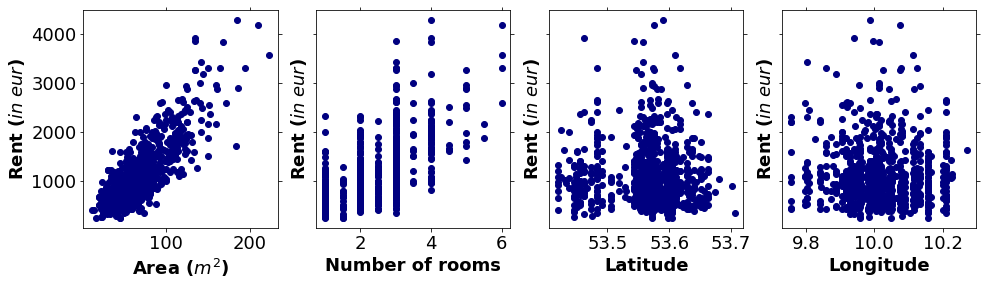

In [14]:
xlabel = ['Area ($m^2$)', 'Number of rooms', 'Latitude', 'Longitude']
x_plot = [area_clean, rooms_clean, latitude, longitude]

#save the clean data frame for later use
#dataset = pd.DataFrame({xlabel[0]: x_plot[0], xlabel[1]: x_plot[1], xlabel[2]: x_plot[2], xlabel[3]:x_plot[3], 'Rent (in eur)': rent_clean})
#dataset.to_csv('Clean rent data_Hamburg.csv', index=False)

#plotting
fig1,ax1=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(len(ax1)):
    ax1[i].scatter(x_plot[i], rent_clean)
    ax1[i].set_xlabel(xlabel[i])
    ax1[i].set_ylabel('Rent ($in\;eur$)')